<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.2 T-SNEによる次元削除
- 目的
    - 高次元のデータをT-SNEを用いて低次元にマッピング
- 内容
    - 28x28サイズの784次元の数字画像データを2次元にマッピング
    - 784次元で近いデータ同士が2次元でも近い事を確認する

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
# It takes long time to download MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
np.random.seed(42)
m = 5000
idx = np.random.permutation(60000)[:m]

In [4]:
X = mnist['data'].values[idx]
Y = mnist['target'].values[idx]

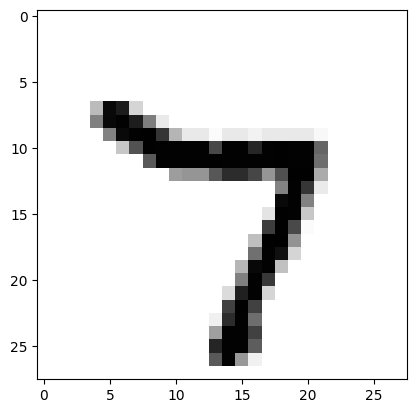

In [5]:
plt.imshow(X[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

In [6]:
# 画像の数値データ
print(X[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

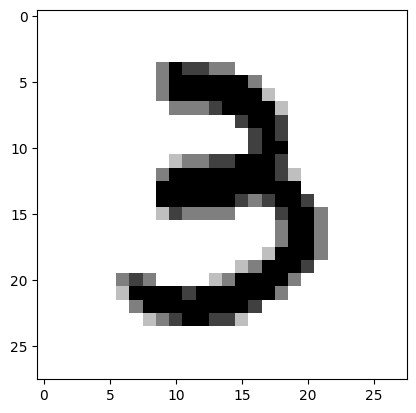

In [7]:
plt.imshow(X[1].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

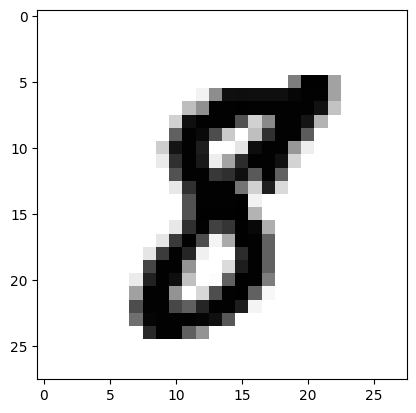

In [8]:
plt.imshow(X[2].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

In [9]:
# T-SNEによる次元削除
tsne = TSNE(n_components=2, random_state=42)
X_reduced  = tsne.fit_transform(X)

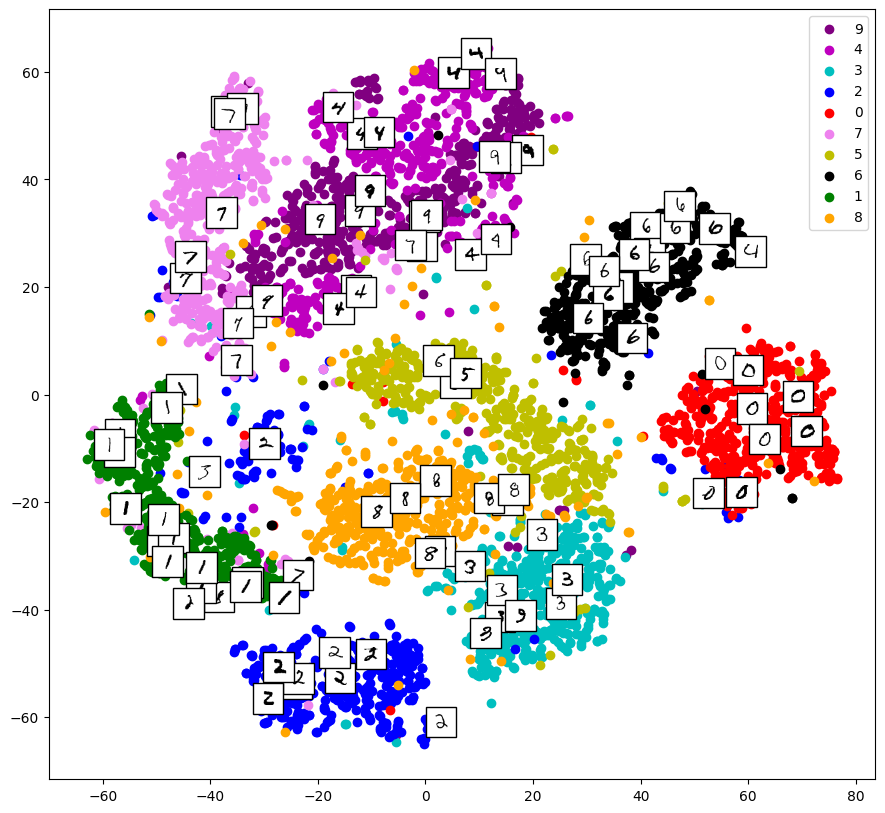

In [10]:
# 各データを2次元に削減した上で、対応する座標値に元画像をプロット
# 近い画像同士が、2次元上で近い位置にいることが確認できる
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
target_ids = range(len(set(Y)))

colors = {'0': 'r', '1': 'g', '2': 'b', '3': 'c', '4': 'm', '5': 'y', '6': 'k', '7': 'violet', '8': 'orange', '9': 'purple'}

plt.figure(figsize=(12, 10))

ax = plt.subplot(aspect='equal')
for label in set(Y):
    idx = np.where(np.array(Y) == label)[0]
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=colors[label], label=label)

for i in range(0, len(Y), 50):
    img = X[i].reshape(28, 28)
    img = OffsetImage(img, cmap=plt.cm.gray_r, zoom=0.5) 
    ax.add_artist(AnnotationBbox(img, X_reduced[i]))

plt.legend()
plt.show()